Caroline Richards | 3688260102 | Math 446 | Assignment 3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib.image as mpimg
import matplotlib
import itertools

# I. Data Preparation

In this section I load the training and testing datasets for evaluation by elementary multiclass learners. The MNIST datasets are a collection of several thousand lines of 784 pixel color values. In each line, 0 represents white space and numbers 1 through 255 represent a color value. After loading the data sets as separate training and testing dataframes, I can easily split the data into the independent x-training set and the dependent y-training set. The testing dataframe does not include a 'label' column, so it can simple be loaded as a x-dataset. The y-training set is the 'label' column of the MNIST dataset which indicates which numerical value that line of values will depict in an image. In order to simplify model learning capabilities, I normalize the pixel values by dividing the x-training data values by 255 to transform the values into a number between 0 and 1. In order to better understand the dataset I am working with, I then use NumPy arrays to visualize one of the rows as a handwritten digit. I reshape the data as a 28x28 image since there are 784 pixels, where $\sqrt(784)=28$. Utilizing matplotlib's image show (imshow) and binary mapping capabilities, I am able to produce a visualization of the handwritten value provided at the 6th location in the dataframe.

In [2]:
# loading the data sources
trainer_df = pd.read_csv("MNIST_train.csv")
x_tester = pd.read_csv("MNIST_test.csv")

# identify x,y portions of the training dataset
y_train=trainer_df['label']
x_train=trainer_df.drop(columns = ['label'])

In [3]:
# normalize pixel numbers
X = x_train/255.0
x_test = x_tester/255.0

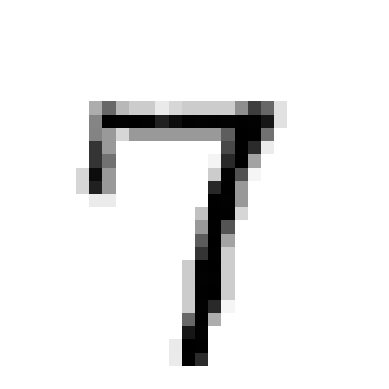

In [4]:
# Visualize the first digit
digit = np.array(X.iloc[6])
digit_image = digit.reshape((28, 28))
plt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# II. Multiclass Learner Training

Before training any multiclass learning models, I encode the y-training set with numerical values as best practice for the training set. I then split the training set into training and testing subsets for model training and prediction.

In [5]:
encode = LabelEncoder()
label_encoded = encode.fit_transform(trainer_df['label'])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_train, test_size = 0.1, random_state=1235)

## a. Decision Tree

Decision tree machine learning algorithms used for classification. In multiclass learning, decision trees are used as a hierarchical structure which partitions the feature space into regions and assigns a class label to each region. It does this by using a recursive process to identify the best feature for splitting data at each node. It creates decision rules at each node to determine which branch to follow much like a piecewise function. 
$\text{Node Decision Rule: if } X_{i} \leq \text{threshold, go LEFT; else go RIGHT}$
Wheer $X_{i}$ is a feature and the threshold is determined through the process of building the decision tree. Building a decision tree often involves entropy and recursive partitioning to make data driven decisions about how to split the dataset at each tree node. Entropy is a concept from information theory which measures the association between a categorical predictor and its class. The smaller the value of entropy, the stronger the alignment of a categorical variable with a class. In machine learning entropy provides a measure of average 'surprise' associated with a variable's possible outcomes. The formula for entropy can be represented mathematically as follows- :
$H(X) = -\sum_{i=1}^{n} P(x_i) \cdot \log_2(P(x_i)) $
-$ H(X)$ is the entropy of the random variable $ X$
-$ n $ is the number of possible outcomes of  $X$
-$P(x_{i})$ is the probability of outcome $x_{i}$
Entropy is always non-negative and maximized when outcomes are equally likely. When this is the case, the formula can be adjusted to be the following:
$H_{\text{max}}(X) = -\log_2\left(\frac{1}{n}\right)$

In [7]:
decision_tree = DecisionTreeClassifier()

k-fold cross validation provides an evaluation metric to assess the performance of the learner model. The k-fold cross validation method takes the training set and splits it into k-number of subsets or "folds". $D = D_{1} \cup D_{2} \cup \ldots \cup D_{k}$  
One of the k-folds is randomly selected as a "hold-out"  while the remaining folds are used to iterate through and fit the machine learning model. The "hold-out" fold is then applied as a testing set and utilized in calculating a test mean squared error or accuracy assessment to evaluate the model's performane. This can be mathematically represented with the followng:me. 

- $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - f(x_i))^2$
- $ACC = \frac{\sum_{i=1}^{N} I(y_i = \hat{y}_i)}{N}$
- $\text{avg\_performance} = \frac{1}{k} \sum_{i=1}^{k} MSE_{i} or ACC_{i}$

In my assessment, I specify 5 'n_splits' meaning that the dataset will be divided into 5-folds for cross-validation. I then set 'shuffle' to true to shuffle the data before splitting to make sure each fold represents the overall data distribution since the data is specifically ordered to produce handwritten values. The 'random_state' allows me to accurately reproduce my results by ensuring the same splits of data each time. 

In [8]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(decision_tree, X_train, Y_train, cv=kfold)

In [9]:
print("Decision Tree Classifier Accuracy:")
print(scores)
print(f"Mean Accuracy: {np.mean(scores):.2f}")

Decision Tree Classifier Accuracy:
[0.8531746  0.8494709  0.8510582  0.8515873  0.85859788]
Mean Accuracy: 0.85


In [10]:
# Create an AdaBoost classifier with Decision Tree as the base estimator
adaboost = AdaBoostClassifier(base_estimator=decision_tree, n_estimators=50)

# Perform k-fold cross-validation
scores = cross_val_score(adaboost, X_train, Y_train, cv=kfold)

print("AdaBoost Classifier Accuracy:")
print(scores)
print(f"Mean Accuracy: {np.mean(scores):.2f}")

AdaBoost Classifier Accuracy:
[0.8494709  0.8457672  0.85145503 0.85449735 0.86071429]
Mean Accuracy: 0.85


Here I implement Ada Boost to improve my decision tree learner. AdaBoost or adaptive boosting is an ensemble learning method that combines the predictions made by the weak learner (in this case the decision tree learner) to create a strong learner. AdaBoost assigns different weights to training instances in the learning process and focuses on retraining the misclassified instances in iterations in order to allow the classification algorithm to learn from its mistakes. 
- It does this by computing the error of the weak learner as follows:
$\text{Error} = \frac{\sum_{\text{misclassified instances}} \text{weight of instance}}{\text{total weight}}$
- It then calculates the weight of the weak learner base on the calculated error. This can represented mathematically as follows, where $\alpha$ represents the learner weight:
$\alpha = \frac{1}{2} \ln\left(\frac{1 - \text{Error}}{\text{Error}}\right)$
- Then the weights for each training instance are updated with $\alpha$ where the weights of misclassified instances are increase and the correctly classified instance weights are decreased. $\text{New Weight} = \text{Old Weight} \times \exp\left(-\alpha \times \text{true class} \times \text{learner prediction}\right)$. The weights are normalized in order to sum to 1.
- AdaBoost then combines the predictions of the weak learner by a weighted majority voting. The final prediction is then determined by the weighted sum of the weak learners' predictions as follows:
$\text{Final Prediction} = \text{sign}\left(\sum_{\text{learners}} \alpha_i \times \text{learner}_i(\text{input})\right)$

## b. Random Forest

I implement the Random Forest multiclass learner next to see if accuracy is improved. Random Forest is another ensemble learning method that constructs many decision trees in training and returns the classification that is the mode or the mean regression prediction of each individual tree. Each tree is constructed of a random subset of the training data through bootstrap sampling. Each tree node has a random subset of features taken into consideration for splitting just as done in decision tree learning. The averaging or voting is done in classification and regression tasks. In classification, each tree votes for a class. The class with the most votes the becomes the predicted class. The predictions from all trees are then averaged using regression to obtain the final prediction. This can be represented mathematically as follows:ion$

$\text{Final Prediction} = \text{argmax}_c \left( \sum_{i=1}^{N} \text{I}(\text{Tree}_i(\text{X}) = c) \right)$

- $Tree_{i}(X)$ is the prediction of the $i$-th tree
- $N$ is the number of trees in the forest
- $c$ is a class label
- $I()$ is the indicator function

In [11]:
rfc = RandomForestClassifier()

In [12]:
rf_scores = cross_val_score(rfc, X_train, Y_train, cv=kfold)

In [13]:
print("Random Forest Classifier Accuracy:")
print(rf_scores)
print(f"Mean Accuracy: {np.mean(rf_scores):.2f}")

Random Forest Classifier Accuracy:
[0.96375661 0.96243386 0.96111111 0.96415344 0.96402116]
Mean Accuracy: 0.96


## c. k-Nearest Neighbors

The last multiclass learner I employ is the k-Nearest Neighbors (KNN) learner. KNN is a supervised classification algorithm that classifies a data point based on the class of its k-number of nearest neighbors. It does so by assuming that data exist in clusters and employing non=parametric methods which exclude any assumptions, including that of normal distribution. The algorithm calculates the similarity between data points by calculating the distance between data points The distance is typically calculated using the Euclidean distance method, $d(p,q) = \sqrt{(q_{1} - p_{1})^{2}+(q_{2} - p_{2})^{2}+ \ldots +(q_{n} - p_{n})^{2}}$. For each data point, the k-nearest neighbors are identified based on the distance metric. The majority class among the cluster of k-neighbors is then assigned to the new data point. This can mathematically be represented with the following:

$
\text{Final Prediction} = \text{argmax}_c \left( \sum_{i=1}^{k} \text{I}(\text{Neighbor}_i = c) \right]
$

In [14]:
knn = KNeighborsClassifier(weights="distance")

In [15]:
knn_scores = cross_val_score(knn, X_train, Y_train, cv=kfold)

In [16]:
print("k-Nearest Neighbors Classifier Accuracy:")
print(knn_scores)
print(f"Mean Accuracy: {np.mean(knn_scores):.2f}")

k-Nearest Neighbors Classifier Accuracy:
[0.96825397 0.96481481 0.96679894 0.96746032 0.96653439]
Mean Accuracy: 0.97


# III. Evaluation

Here I define a classifier evaluation function which will evaluate each multiclass learner. First, using k-fold cross validation I split the dataset into $x$ and $y$ training and testing sets. For each cross-validation iteration, the classifier is trained  on the training set and tested on the testing set. In this case, $x$ is the feature matrix and $y$ is the target variable. Next, I train the machine learning classifier using the training sets for $x$ and $y$ to fit the model. I then use the model to predict with the x-testing set.  I then separate the predicted values and the true outcomes, $y test$, into respective arrays of true labels and predicted labels. I then employ a confusion matrix, which is a table used for performance evaluation when the true values are known, in this case this is my $y test$. It summarizes the results by breaking them down into categories of true positives (TP), true negatives (TN), false positives (FP) , and false negatives (FN). These categories are then used to calculate performance metrics.

- $TP = \sum_{i=1}^{n} \mathbb{1}_{\text{True positive}}(i) $
- $TN = \sum_{i=1}^{n} \mathbb{1}_{\text{True negative}}(i)$
- $FP = \sum_{i=1}^{n} \mathbb{1}_{\text{False positive}}(i)$
- $FN = \sum_{i=1}^{n} \mathbb{1}_{\text{False negative}}(i)$

I then evaluate performance metrics to determine the Accuracy, Precision, Recall (True Positive Rate), and F1 Score for each classifier. These metrics are calculated as follows:
- $ACC = \frac{TP + TN}{TP + TN + FP + FN}$
- $P = \frac{TP}{TP + FP}$
- $R = \frac{TP}{TP + FN}$
- $F1 = 2 \cdot \frac{P \cdot R}{P + R}$

In [27]:
def classifer_evaluation(classifier, X, y, classifier_name):
    all_true_labels = []
    all_predicted_labels = []

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        classifier.fit(X_train, y_train)
        predicted_labels = classifier.predict(X_test)

        all_true_labels.extend(y_test)
        all_predicted_labels.extend(predicted_labels)

    # Calculate and display confusion matrix
    print(f"\n{classifier_name} Classifier Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix(all_true_labels, all_predicted_labels)).plot()

    # Calculate and display other metrics
    accuracy = accuracy_score(all_true_labels, all_predicted_labels)
    precision = precision_score(all_true_labels, all_predicted_labels, average='weighted')
    recall = recall_score(all_true_labels, all_predicted_labels, average='weighted')
    f1 = f1_score(all_true_labels, all_predicted_labels, average='weighted')

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")


## a. Decision Tree Evaluation


Decision Tree Classifier Confusion Matrix:
Accuracy: 0.857
Precision: 0.857
Recall: 0.857
F1 Score: 0.857


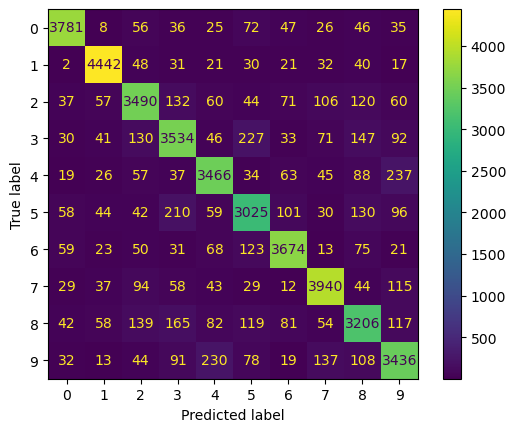

In [28]:
classifer_evaluation(decision_tree, X, y_train, 'Decision Tree')

## b. Ada Boost + Decision Tree Evaluation


Decision Tree + AdaBoost Classifier Confusion Matrix:
Accuracy: 0.856
Precision: 0.855
Recall: 0.856
F1 Score: 0.855


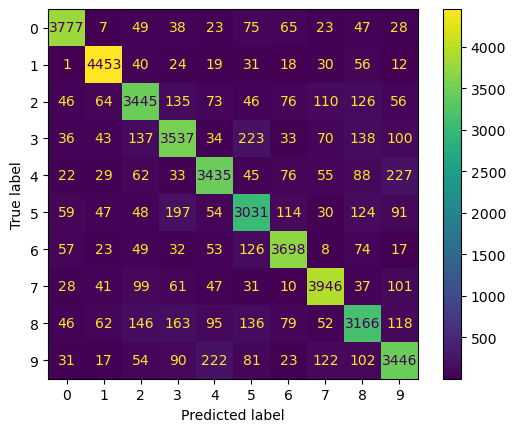

In [29]:
classifer_evaluation(adaboost, X, y_train, 'Decision Tree + AdaBoost')

## C. Random Forest Evaluation


Random Forest Classifier Confusion Matrix:
Accuracy: 0.964
Precision: 0.964
Recall: 0.964
F1 Score: 0.964


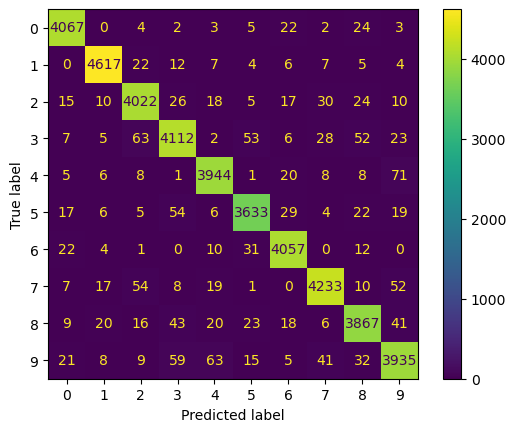

In [30]:
classifer_evaluation(rfc, X, y_train, 'Random Forest')

## d. k-Nearest Neighbors Evaluation


k-Nearest Neighbors Classifier Confusion Matrix:
Accuracy: 0.968
Precision: 0.968
Recall: 0.968
F1 Score: 0.968


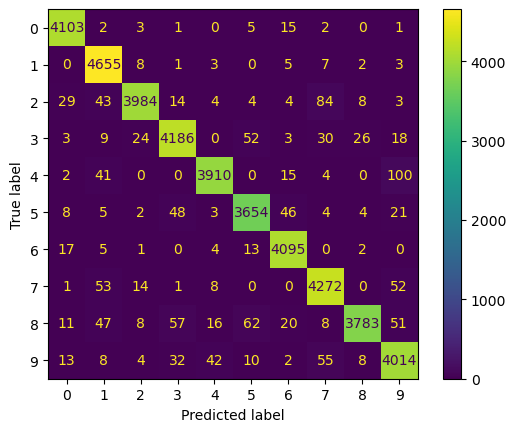

In [31]:
classifer_evaluation(knn, X, y_train, 'k-Nearest Neighbors')

# IV. Conclusion

Both the Decision Tree and the Decision Tree combined with Ada Boost have consistent metrics suggesting an overall performance of 85%. The Ada Boost addition does not statistically improve the performance of the decision tree learner in this case. The Random Forest classifier was significantly higher in its performance with accuracy, prescision, recall, and F1 scores of 96%. This indicates the the random forest classifier is a robust and accurate model for predicting the handwritten dgits. The k-Nearest Neighbors classifier exhibited the highest performance among all three classifiers with overall performances of 97% suggesting high accuracy and effectiveness in its predictions. All three classifiers perform well. In terms of selecting the best model, Random Forest and k-Nearest Neighbors would be preferred to the Decision Tree or Decision Tree + Ada Boost classifier. If precision, recall, and F1 are crucial, k-Nearest Neighbors is the better choice. However, if model robustness and accuracy are preferred, Random Forest is the better choice.